# Libraries

In [1]:
import os
import sys


current_dir = os.getcwd()
resources_folder = os.path.join(current_dir, '..', 'resources')
sys.path.append(resources_folder)

# Data reading and processing

## Data reading

In [2]:
%%capture
import pandas as pd
import numpy as np
from reject_inference import df

## Data processing

In [3]:
import model_training as mt
from sklearn.metrics import roc_auc_score, average_precision_score

# Select data for model development and for testing purposes
data_dev, filters_applied_dev = mt.build_model_development_sample(data=df)
data_test, filters_applied_test = mt.build_model_application_sample(data=df)
data_scoring, filters_applied_scoring = mt.build_model_scoring_sample(data=df)

In [4]:
print(data_scoring['decision_date'].min())
print(data_scoring['decision_date'].max())

2024-02-17
2025-05-07


In [5]:
# print(len(data_scoring))
# data_scoring['decision_date'] = pd.to_datetime(data_scoring['decision_date']) 

# max_decision_date = data_scoring['decision_date'].max()

# data_scoring = data_scoring[data_scoring['decision_date'] <= max_decision_date - pd.DateOffset(years=1)]
# print(len(data_scoring))


Original data shape: (342610, 67)
Filters applied for model development sample: {'original_rows': 53416, 'unique_apps': 53416, 'remove_existing_exposure': 43136, 'remove_prepaid_deposit': 38754, 'remove_credit_line_approved_lt_1': 35424, 'remove_security_deposit': 35240, 'remove_credit_line_gt_150k': 35116, 'remove_fraud_flag': 34975, 'remove_first_payment_default': 34872, 'remove_non_child_funded': 34792}
Filters applied for model application sample: {'original_rows': 19494, 'unique_apps': 19494, 'remove_existing_exposure': 14215, 'remove_prepaid_deposit': 12736, 'remove_credit_line_approved_lt_1': 11533, 'remove_security_deposit': 11492, 'remove_credit_line_gt_150k': 11458, 'remove_fraud_flag': 11400, 'remove_first_payment_default': 11256, 'remove_non_child_funded': 11256}
Filters applied for model scoring sample: {'original_rows': 54394, 'unique_apps': 53561, 'remove_existing_exposure': 43511, 'remove_prepaid_deposit': 26109, 'remove_credit_line_approved_lt_1': 25874, 'remove_securi

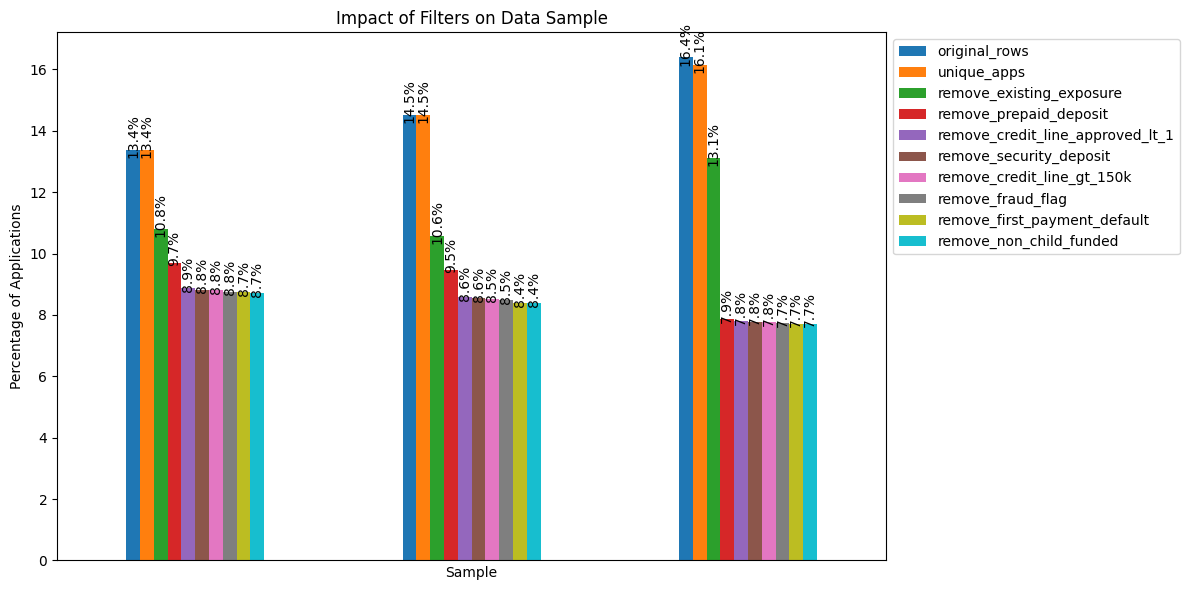

In [6]:
print(f"Original data shape: {df.shape}")
print(f"Filters applied for model development sample: {filters_applied_dev}")
print(f"Filters applied for model application sample: {filters_applied_test}")
print(f"Filters applied for model scoring sample: {filters_applied_scoring}")

mt.filters_applied_chart(filters_applied_dev, filters_applied_test, filters_applied_scoring)

Model development Through the door number of transactions: 34792


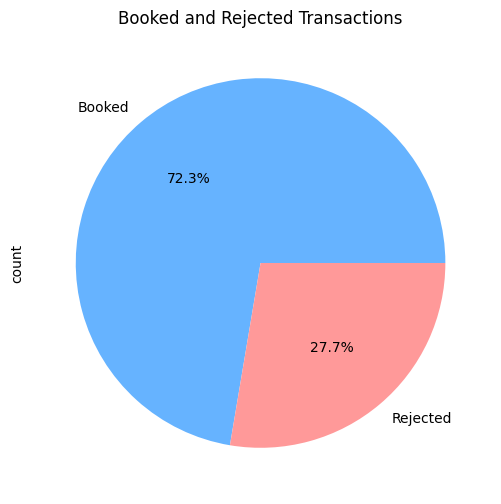

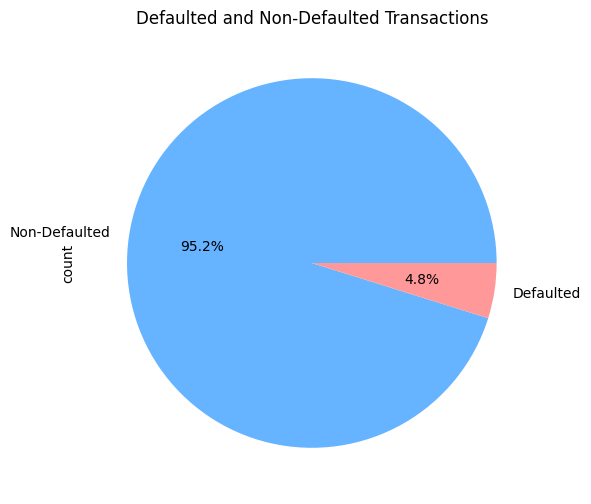

In [7]:
print(f"Model development Through the door number of transactions: {data_dev.shape[0]}")
mt.booked_rejected_pie_chart(data_dev)
mt.default_pie_chart(data_dev)

Model application  Through the door number of transactions: 11256


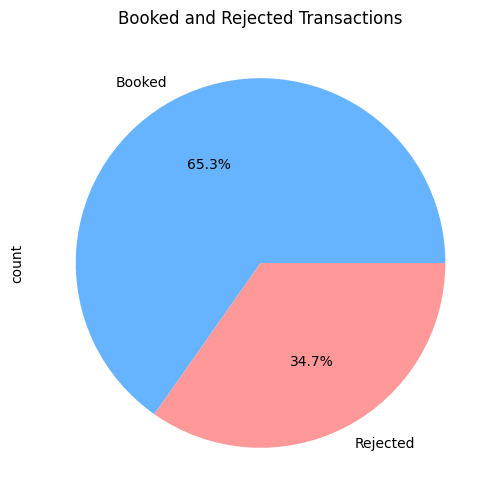

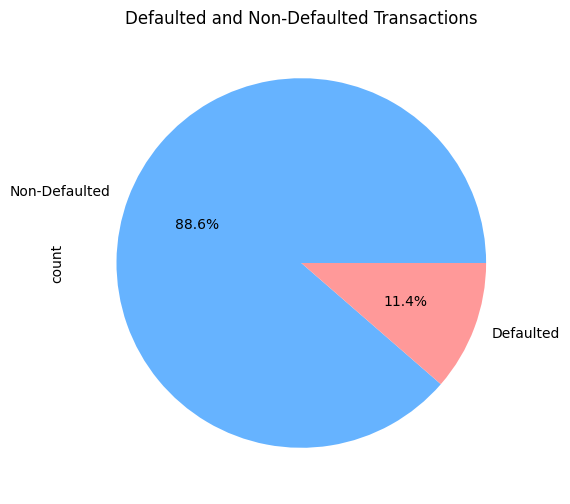

In [8]:
print(f"Model application  Through the door number of transactions: {data_test.shape[0]}")
mt.booked_rejected_pie_chart(data_test)
mt.default_pie_chart(data_test)

Model scoring Through the door number of transactions: 25606


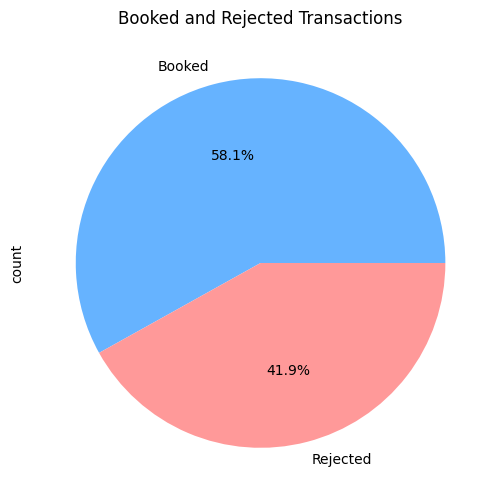

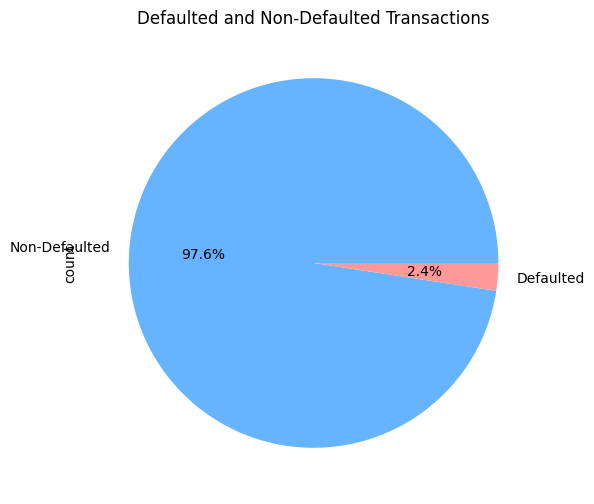

In [9]:
print(f"Model scoring Through the door number of transactions: {data_scoring.shape[0]}")
mt.booked_rejected_pie_chart(data_scoring)
mt.default_pie_chart(data_scoring)

# Current Model

In [10]:
data_dev

,application_number,ar_id,booked,decision_date,number_of_trucks_c,program_group,product_type_c,fraud_flag_c,existing_exposure_check_c,credit_line_requested_c,...,lexis_nexis_reason_code_4_c,adverse_action_code_c,offer_c,detailed_funding_type_2024,pg_required_c,b2bcnt2y_ln,sbfecardcount_ln,sbfeaccountcount_ln,sbfehitindex_ln,years_in_business_num_c
22,388649,3770002105262,True,2021-03-26,1.0,RTS Fleet One,OTR,False,Passed,2000.0,...,None,None,a3L700000004RGEEA2,UNKNOWN,True,0.0,-99.0,-99.0,1.0,7.0
23,398649,3770002108191,True,2021-05-07,4.0,Edge,OTR,False,Passed,8000.0,...,None,None,a3L0g000000HJ7gEAG,UNKNOWN,False,0.0,2.0,2.0,3.0,5.0
29,376324,6232101363,True,2021-05-03,5.0,other,OTR - LLC,False,Passed,7500.0,...,None,A2,a3L0g000000HLfGEAW,UNKNOWN,True,0.0,0.0,1.0,3.0,9.0
44,437343,3770002121148,True,2021-11-02,1.0,RTS Fleet One,OTR,False,Passed,2200.0,...,None,B4,a3L700000004RGEEA2,UNKNOWN,False,0.0,-99.0,-99.0,1.0,5.0
56,406535,2550002116603,True,2021-06-14,1.0,other,OTR,False,Passed,2000.0,...,None,None,a3L0g000000HLmbEAG,UNKNOWN,True,0.0,-99.0,-99.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342560,375044,-1,False,2021-01-07,1.0,RTS Fleet One,OTR,False,Passed,1500.0,...,None,A2,a3L700000004RGEEA2,UNKNOWN,True,-99999.0,-99.0,-99.0,0.0,8.0
342563,428047,-1,False,2021-09-22,1.0,other,OTR,False,Passed,3300.0,...,None,B4,a3L0g000000HJBEEA4,UNKNOWN,True,0.0,-99.0,-99.0,1.0,4.0
342570,380342,-1,False,2021-02-05,1.0,Edge,OTR,False,Passed,1500.0,...,None,None,a3L0g000000HJ7gEAG,UNKNOWN,True,0.0,-99.0,-99.0,1.0,6.0
342585,444369,-1,False,2021-12-02,4.0,Edge,OTR,False,Passed,14400.0,...,None,F7,a3L0g000000HJ7gEAG,UNKNOWN,True,0.0,-99.0,-99.0,1.0,4.0


In [11]:
# Define the conditions and choices once ----- current model

import config
conditions = config.CONDITIONS_CURRENT_MODEL
choices = config.CHOICES_CURRENT_MODEL
RISK_GRADE_SEGMENTS = config.RISK_GRADE_SEGMENTS
NORMALIZE_SCORES = config.NORMALIZE_SCORES

# Apply the function to both dataframes
data_dev = mt.apply_risk_grade_path(data_dev, conditions, choices)
data_test = mt.apply_risk_grade_path(data_test, conditions, choices)
data_scoring = mt.apply_risk_grade_path(data_scoring, conditions, choices)


In [12]:
# count nan values in each risk grade
print(data_dev[['risk_grade_path', 'ln_score', 'fico_score']].groupby('risk_grade_path').apply(lambda x: x.isnull().sum()))

# add the count of total transactions in each risk grade
data_dev['total_transactions'] = 1
data_dev[['risk_grade_path', 'total_transactions']].groupby('risk_grade_path').sum()


                 risk_grade_path  ln_score  fico_score
risk_grade_path                                       
UNKNOWN                        0       522         317
double_no_hit                  0      4841        1244
sba                            0         0       12403
sbfe                           0         0        5415


C:\Users\W516236\AppData\Local\Temp\ipykernel_8948\2142281097.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(data_dev[['risk_grade_path', 'ln_score', 'fico_score']].groupby('risk_grade_path').apply(lambda x: x.isnull().sum()))


,total_transactions
risk_grade_path,
UNKNOWN,522
double_no_hit,4841
sba,21398
sbfe,8031


## Training model

In [13]:
data_dev_filtered = mt.risk_grade_estimate_preprocessing(data_dev)

models_dict, normalization_dict = mt.fit_models_for_segments(data_dev_filtered, RISK_GRADE_SEGMENTS, NORMALIZE_SCORES, None, 10, None)

mt.generate_model_parameters_df(models_dict=models_dict)

data_test_filtered = mt.risk_grade_estimate_preprocessing(data_test)

data_scoring_filtered = mt.risk_grade_estimate_preprocessing(data_scoring)

data_dev_scored = mt.apply_fitted_models_to_data(
    data=data_dev_filtered,
    models_dict=models_dict,
    normalization_dict=normalization_dict,
    RISK_GRADE_SEGMENTS=RISK_GRADE_SEGMENTS,
)

data_test_scored = mt.apply_fitted_models_to_data(
    data=data_test_filtered,
    models_dict=models_dict,
    normalization_dict=normalization_dict,
    RISK_GRADE_SEGMENTS=RISK_GRADE_SEGMENTS,
)

data_scoring_scored = mt.apply_fitted_models_to_data(
    data=data_scoring_filtered,
    models_dict=models_dict,
    normalization_dict=normalization_dict,
    RISK_GRADE_SEGMENTS=RISK_GRADE_SEGMENTS,
)

print(len(data_test_scored))
print(len(data_scoring_scored))


# Define the risk grade thresholds
new_pd_risk_grade_thresholds = {
    "1a": (0.00, 0.0009),
    "1b": (0.0009, 0.0022),
    "1c": (0.0022, 0.0066),
    "2a": (0.0066, 0.0110),
    "2b": (0.0110, 0.0165),
    "2c": (0.0165, 0.0248),
    "3a": (0.0248, 0.0371),
    "3b": (0.0371, 0.0464),
    "3c": (0.0464, 0.0557),
    "4a": (0.0557, 0.0835),
    "4b": (0.0835, 0.1040),
    "4c": (0.1040, 0.1280),
    "5a": (0.1280, 0.1570),
    "5b": (0.1570, 0.1930),
    "5c": (0.1930, 0.2370),
    "6a": (0.2370, 0.2910),
    "6b": (0.2910, 0.3570),
    "6c": (0.3570, 0.5000),
    "7a": (0.5000, 0.8140),
    "7b": (0.8140, 1.0000),
}

# Define the approval/decline thresholds based on risk grade
approval_thresholds = {
    "1a": True,
    "1b": True,
    "1c": True,
    "2a": True,
    "2b": True,
    "2c": True,
    "3a": True,
    "3b": True,
    "3c": True,
    "4a": False,  # Decline starts here
    "4b": False,
    "4c": False,
    "5a": False,
    "5b": False,
    "5c": False,
    "6a": False,
    "6b": False,
    "6c": False,
    "7a": False,
    "7b": False,
}



# Calculate segment statistics with approval/decline thresholds
segment_stats_df = mt.calculate_segment_statistics_with_approval(
    data=data_test_scored,
    RISK_GRADE_SEGMENTS=RISK_GRADE_SEGMENTS,
    risk_grade_thresholds=new_pd_risk_grade_thresholds,
    approval_thresholds=approval_thresholds,
)

# Display the results
print(segment_stats_df)

segment_stats_df = mt.calculate_segment_statistics_with_approval(
    data=data_scoring_scored,
    RISK_GRADE_SEGMENTS=RISK_GRADE_SEGMENTS,
    risk_grade_thresholds=new_pd_risk_grade_thresholds,
    approval_thresholds=approval_thresholds,
)

# Display the results
print(segment_stats_df)

c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: 0.110094
         Iterations: 45
         Function evaluations: 80
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 0.212907
         Iterations: 48
         Function evaluations: 65
         Gradient evaluations: 61


c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: 0.101759
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 36
Segment: sbfe_ln_and_fico
Expected features in model: (4,)
Actual features in data: (8031, 4)
Columns in exog_data: ['intercept', 'ln_score', 'fico_score_filled', 'no_fico']
Segment: sba_ln_and_fico
Expected features in model: (4,)
Actual features in data: (21398, 4)
Columns in exog_data: ['intercept', 'ln_score', 'fico_score_filled', 'no_fico']
Segment: no_hit
Expected features in model: (2,)
Actual features in data: (5363, 2)
Columns in exog_data: ['intercept', 'fico_score']
Segment: sbfe_ln_and_fico
Expected features in model: (4,)
Actual features in data: (3828, 4)
Columns in exog_data: ['intercept', 'ln_score', 'fico_score_filled', 'no_fico']
Segment: sba_ln_and_fico
Expected features in model: (4,)
Actual features in data: (5994, 4)
Columns in exog_data: ['intercept', 'ln_score', 'fico_score_filled', 'no_fico']

In [14]:
normalization_dict

{'sbfe_ln_and_fico': None, 'sba_ln_and_fico': None, 'no_hit': None}

### AUC - PR AUC

In [15]:

df_performance = data_dev_scored.copy()
df_performance['segment'] = df_performance['risk_grade_path'].replace({'double_no_hit': 'no_hit_unknown', 'UNKNOWN': 'no_hit_unknown'})

# Calculate segment counts
segment_counts = df_performance['segment'].value_counts()

# Initialize dictionaries to store AUC and PR-AUC results
auc_results = {}
prauc_results = {}


for segment in df_performance['segment'].unique():
    segment_data = df_performance[df_performance['segment'] == segment]

    if segment == 'sbfe':
        y_true = (segment_data['is_bad']).astype(int)  # Convert boolean to integer
        y_score = segment_data['pd_sbfe_ln_and_fico']
        
    elif segment == 'sba':
        y_true = (segment_data['is_bad']).astype(int)
        y_score = segment_data['pd_sba_ln_and_fico']

    elif segment == 'no_hit_unknown':
        segment_data = segment_data.dropna(subset=['pd_no_hit'])
        y_true = (segment_data['is_bad']).astype(int)
        y_score = segment_data['pd_no_hit']
    else:
        continue  # Skip if any unexpected segment

    auc = roc_auc_score(y_true, y_score)
    auc_results[segment] = auc

    prauc = average_precision_score(y_true, y_score)
    prauc_results[segment] = prauc


# Print the results
print("Segment Counts:\n", segment_counts)
print("\nAUC Results:\n", auc_results)
print("\nPR-AUC Results:\n", prauc_results)


Segment Counts:
 segment
sba               21398
sbfe               8031
no_hit_unknown     5363
Name: count, dtype: int64

AUC Results:
 {'sbfe': np.float64(0.7717420993787062), 'sba': np.float64(0.6228054470486111), 'no_hit_unknown': np.float64(0.5710043093585538)}

PR-AUC Results:
 {'sbfe': np.float64(0.055709841340779616), 'sba': np.float64(0.05651337862828951), 'no_hit_unknown': np.float64(0.016133576731157288)}


In [16]:

df_performance = data_test_scored.copy()
df_performance['segment'] = df_performance['risk_grade_path'].replace({'double_no_hit': 'no_hit_unknown', 'UNKNOWN': 'no_hit_unknown'})

# Calculate segment counts
segment_counts = df_performance['segment'].value_counts()

# Initialize dictionaries to store AUC and PR-AUC results
auc_results = {}
prauc_results = {}


for segment in df_performance['segment'].unique():
    segment_data = df_performance[df_performance['segment'] == segment]

    if segment == 'sbfe':
        y_true = (segment_data['is_bad']).astype(int)  # Convert boolean to integer
        y_score = segment_data['pd_sbfe_ln_and_fico']
        
    elif segment == 'sba':
        y_true = (segment_data['is_bad']).astype(int)
        y_score = segment_data['pd_sba_ln_and_fico']

    elif segment == 'no_hit_unknown':
        segment_data = segment_data.dropna(subset=['pd_no_hit'])
        y_true = (segment_data['is_bad']).astype(int)
        y_score = segment_data['pd_no_hit']
    else:
        continue  # Skip if any unexpected segment

    auc = roc_auc_score(y_true, y_score)
    auc_results[segment] = auc

    prauc = average_precision_score(y_true, y_score)
    prauc_results[segment] = prauc


# Print the results
print("Segment Counts:\n", segment_counts)
print("\nAUC Results:\n", auc_results)
print("\nPR-AUC Results:\n", prauc_results)


Segment Counts:
 segment
sba               5994
sbfe              3828
no_hit_unknown    1434
Name: count, dtype: int64

AUC Results:
 {'sbfe': np.float64(0.6532294261096859), 'sba': np.float64(0.5336170925380632), 'no_hit_unknown': np.float64(0.5316442388561817)}

PR-AUC Results:
 {'sbfe': np.float64(0.09269134004110358), 'sba': np.float64(0.08689769446192414), 'no_hit_unknown': np.float64(0.03509907959770832)}


### Lift Charts

#### SBFE

  risk_grade_path  booked  is_bad  count
0   double_no_hit   False   False    648
1   double_no_hit    True   False    721
2   double_no_hit    True    True     65
3             sba   False   False   2299
4             sba    True   False   3171
5             sba    True    True    524
6            sbfe   False   False    964
7            sbfe    True   False   2617
8            sbfe    True    True    247
11256


c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\otr_ln_master_table\notebooks\..\resources\model_training.py:896: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\otr_ln_master_table\notebooks\..\resources\model_training.py:896: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


11256


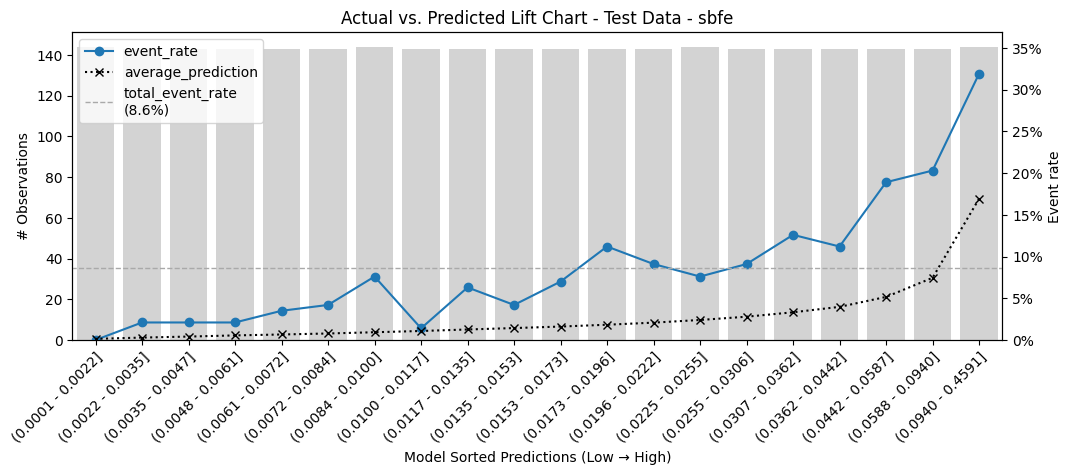

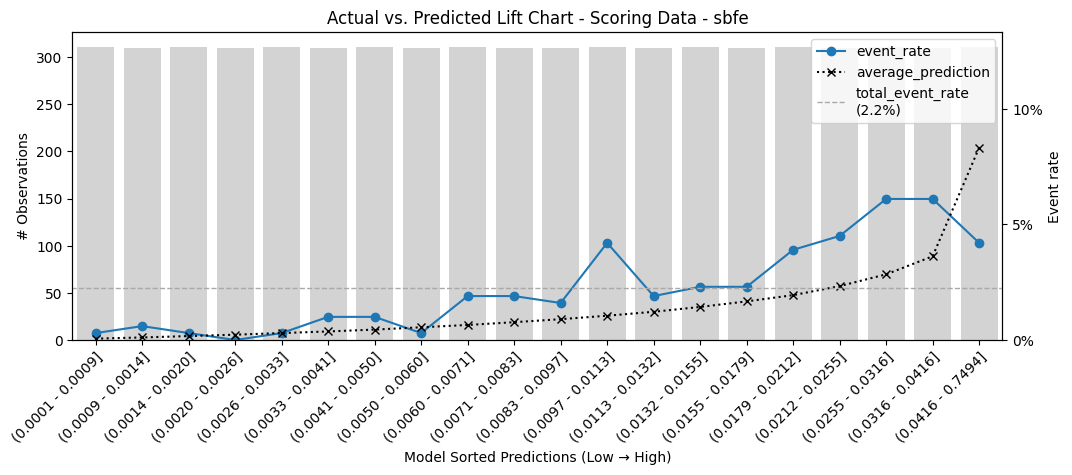

In [17]:
grouped_data = data_test_scored.groupby(["risk_grade_path", "booked", "is_bad"]).size().reset_index(name="count")

print(grouped_data)
print(sum(grouped_data["count"]))

mt.lift_chart_plot('Test Data - sbfe', mt.compute_decile_table(
        data_test_scored[data_test_scored['booked'] == True],
        'pd_sbfe_ln_and_fico',
        'is_bad',
        20,
        'sbfe'
), 'PROB_RANGE')


mt.lift_chart_plot('Scoring Data - sbfe', mt.compute_decile_table(
        data_scoring_scored[data_scoring_scored['booked'] == True],
        'pd_sbfe_ln_and_fico',
        'is_bad',
        20,
        'sbfe'
), 'PROB_RANGE')
print(len(data_test_scored))

#### SBA

c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\otr_ln_master_table\notebooks\..\resources\model_training.py:896: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\otr_ln_master_table\notebooks\..\resources\model_training.py:896: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


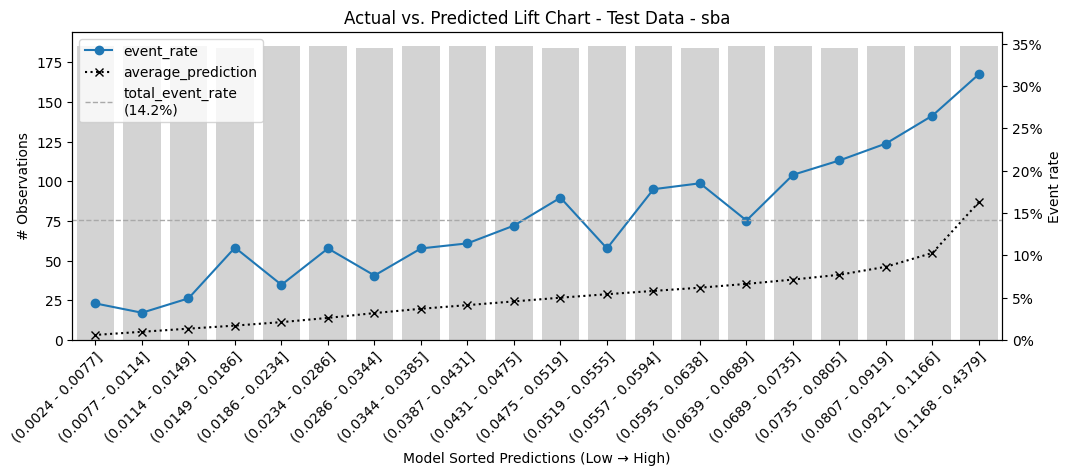

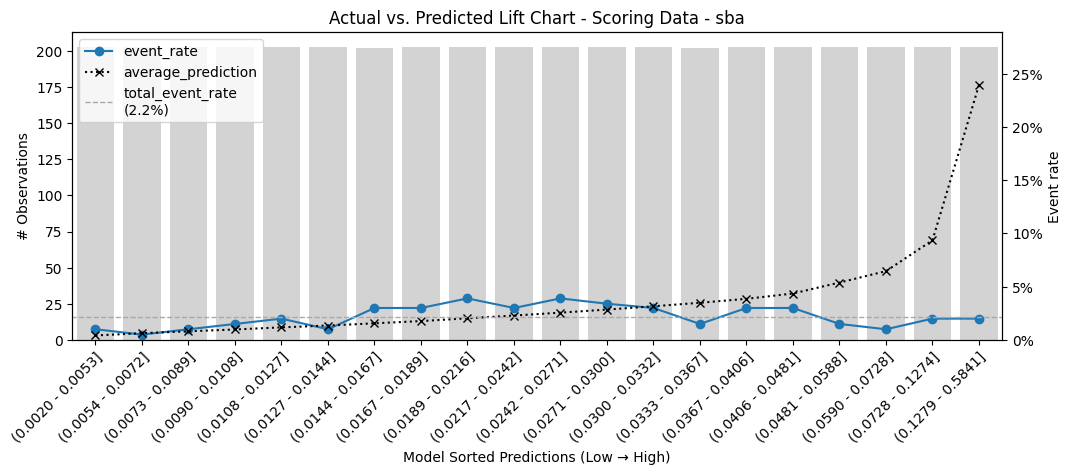

In [18]:

mt.lift_chart_plot('Test Data - sba', mt.compute_decile_table(
        data_test_scored[data_test_scored['booked']],
        'pd_sba_ln_and_fico',
        'is_bad',
        20,
        'sba'
), 'PROB_RANGE')


mt.lift_chart_plot('Scoring Data - sba', mt.compute_decile_table(
        data_scoring_scored[data_scoring_scored['booked']],
        'pd_sba_ln_and_fico',
        'is_bad',
        20,
        'sba'
), 'PROB_RANGE')

#### No - Hit

c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\otr_ln_master_table\notebooks\..\resources\model_training.py:896: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\W516236\dev_work\reject_inference\otr_adj\otr_adj_model_flow_proposal\otr_ln_master_table\notebooks\..\resources\model_training.py:896: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


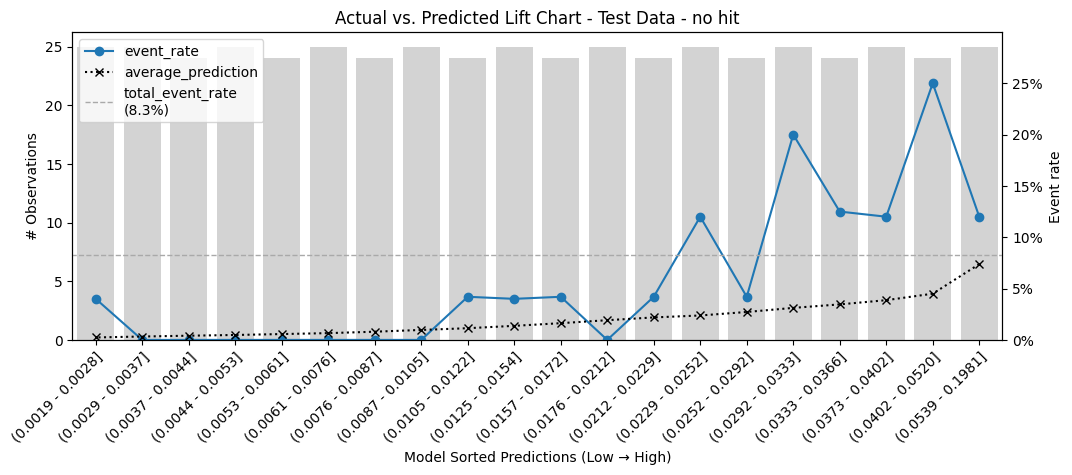

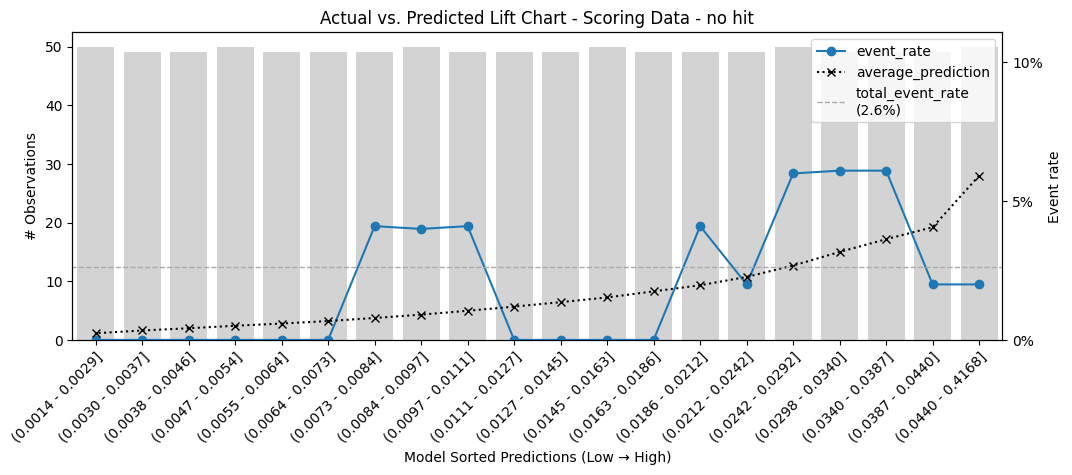

In [19]:

mt.lift_chart_plot('Test Data - no hit', mt.compute_decile_table(
        data_test_scored[data_test_scored['booked']],
        'pd_no_hit',
        'is_bad',
        20,
        'double_no_hit'
), 'PROB_RANGE')


mt.lift_chart_plot('Scoring Data - no hit', mt.compute_decile_table(
        data_scoring_scored[data_scoring_scored['booked']],
        'pd_no_hit',
        'is_bad',
        20,
        'double_no_hit'
), 'PROB_RANGE')